In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('master.csv')

In [3]:
data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [4]:
data.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
data.shape

(27820, 12)

In [8]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [21]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_check(data)

Total   Percent
HDI for year        19456  0.699353
generation              0  0.000000
gdp_per_capita ($)      0  0.000000
 gdp_for_year ($)       0  0.000000
country-year            0  0.000000
suicides/100k pop       0  0.000000
population              0  0.000000
suicides_no             0  0.000000
age                     0  0.000000
sex                     0  0.000000
year                    0  0.000000
country                 0  0.000000

In [22]:
data[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].describe()

suicides_no    population  suicides/100k pop  gdp_per_capita ($)
count  27820.000000  2.782000e+04       27820.000000        27820.000000
mean     242.574407  1.844794e+06          12.816097        16866.464414
std      902.047917  3.911779e+06          18.961511        18887.576472
min        0.000000  2.780000e+02           0.000000          251.000000
25%        3.000000  9.749850e+04           0.920000         3447.000000
50%       25.000000  4.301500e+05           5.990000         9372.000000
75%      131.000000  1.486143e+06          16.620000        24874.000000
max    22338.000000  4.380521e+07         224.970000       126352.000000

In [23]:
my_tab = pd.crosstab(index=data["age"],
                    columns="count")
my_tab

col_0        count
age               
15-24 years   4642
25-34 years   4642
35-54 years   4642
5-14 years    4610
55-74 years   4642
75+ years     4642

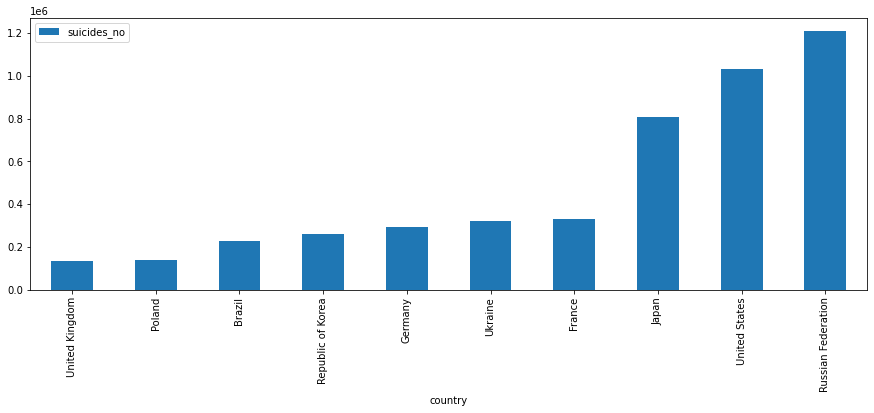

In [29]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',
                                                                                                         y='suicides_no',
                                                                                                         kind='bar',
                                                                                                         figsize=(15,5))
plt.show()

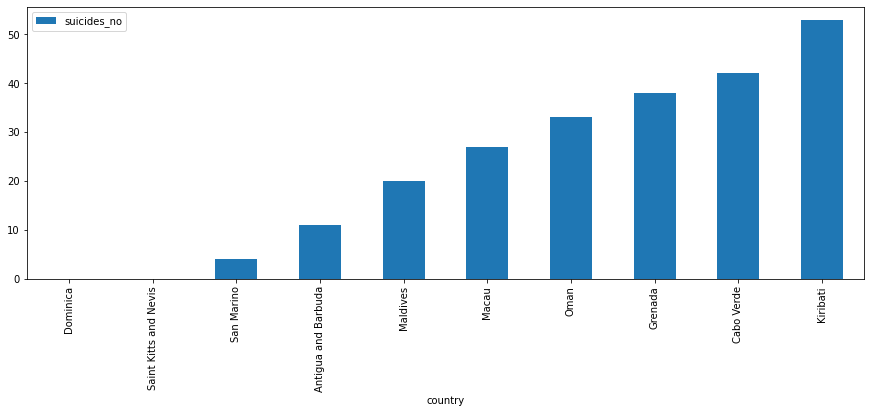

In [31]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(10).plot(x='country', y='suicides_no', kind='bar', figsize=(15,5))
plt.show()

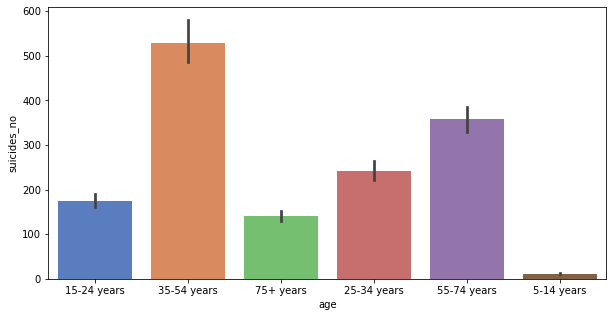

In [33]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')

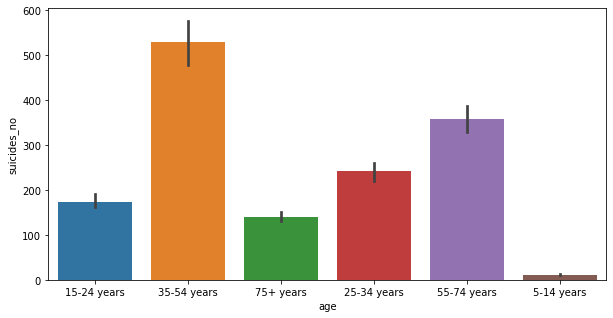

In [37]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='age', y='suicides_no', data=data)

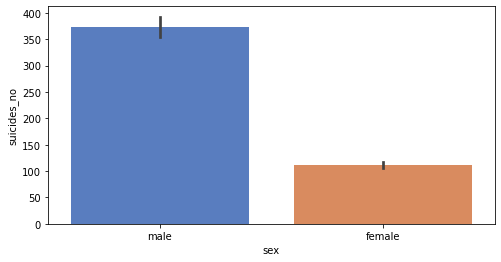

In [35]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=data, palette='muted')

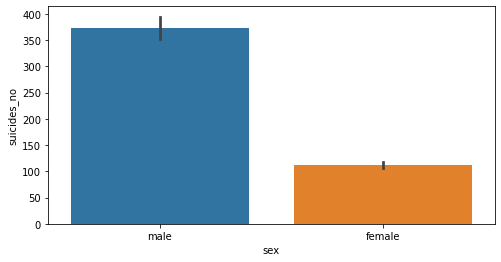

In [36]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=data)

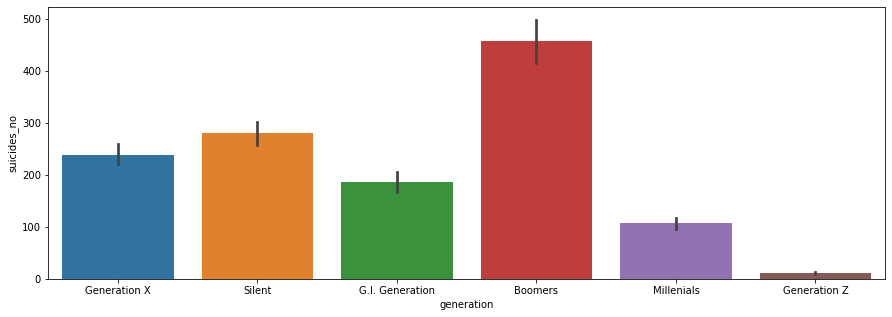

In [38]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="generation", y="suicides_no", data=data)

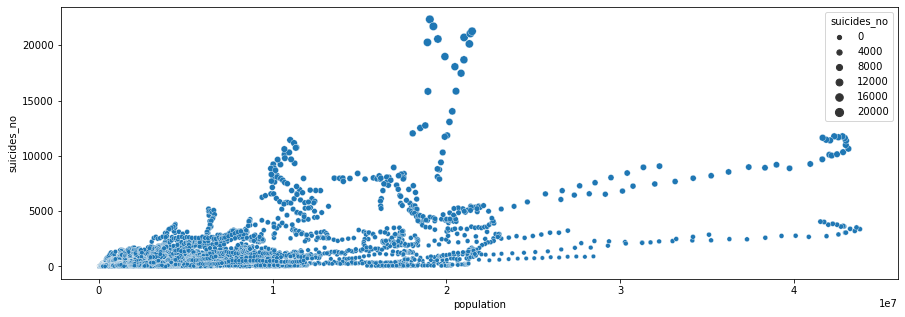

In [39]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=data['population'], y='suicides_no', data=data, size = "suicides_no")

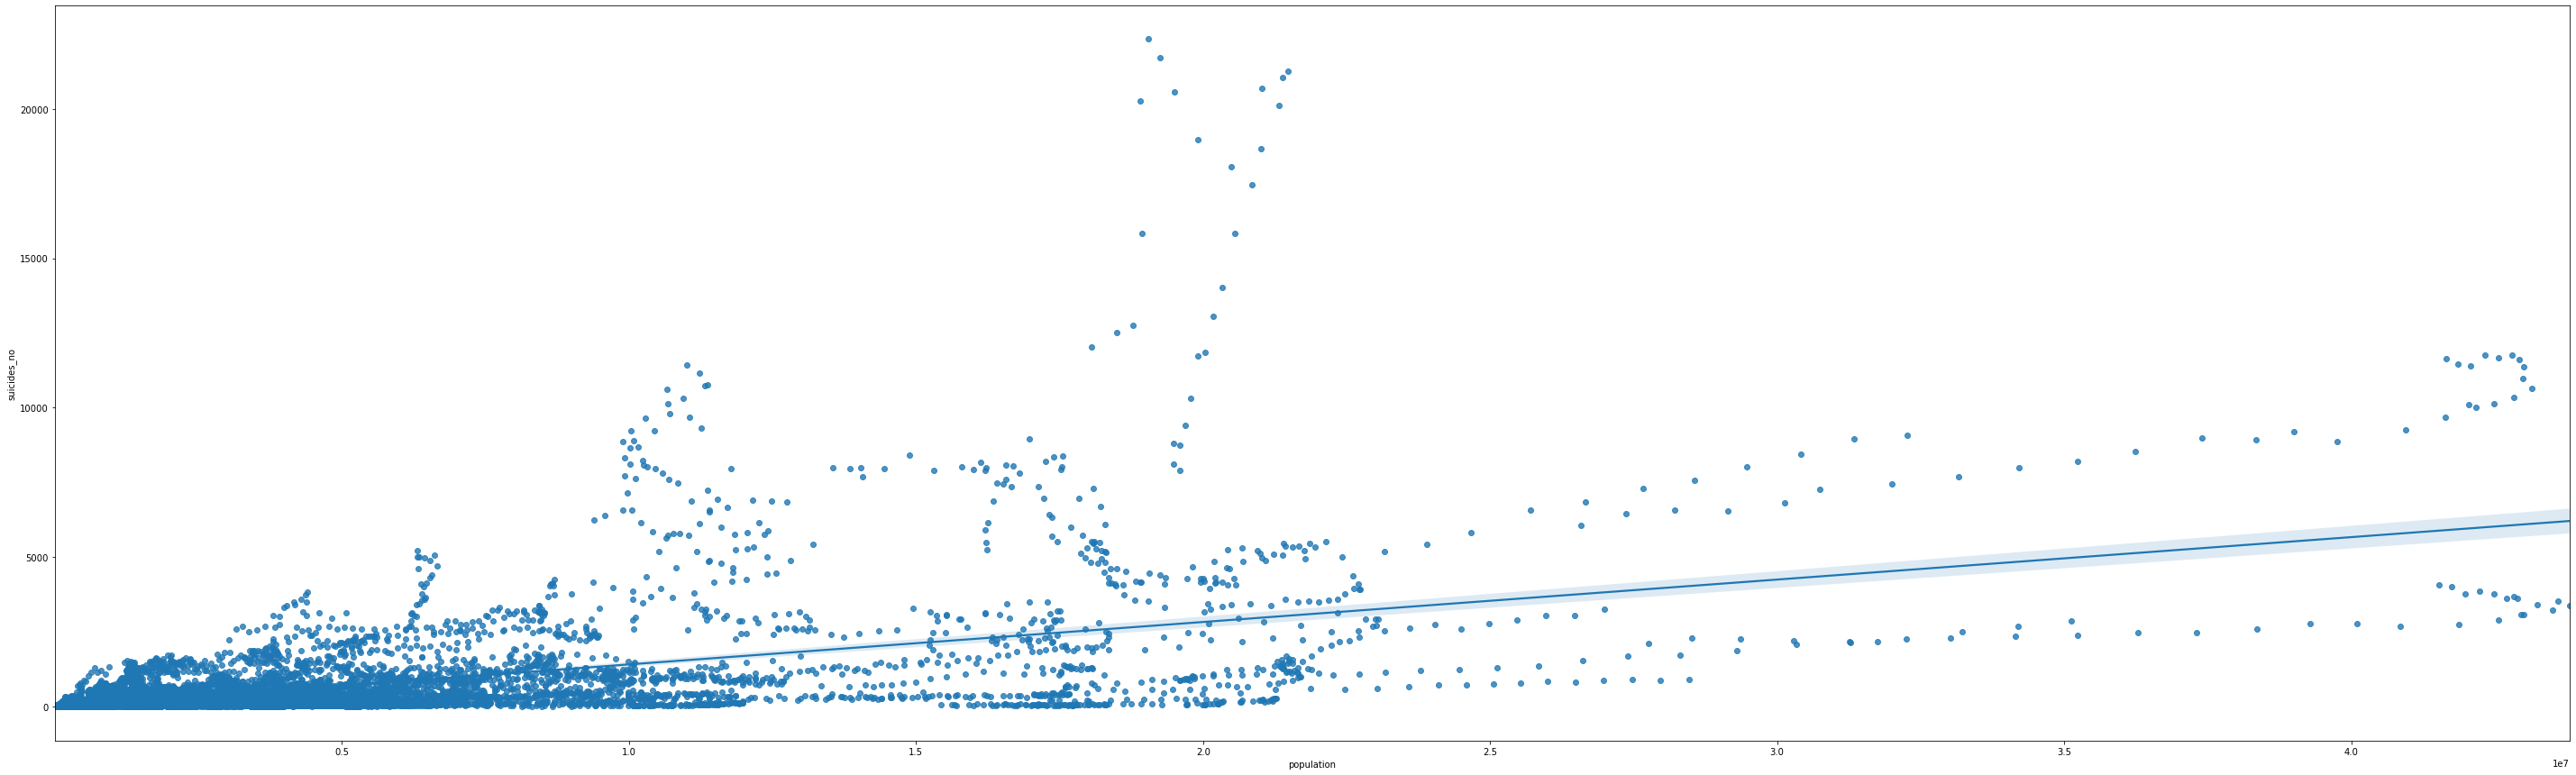

In [40]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='population', y='suicides_no', data=data)

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

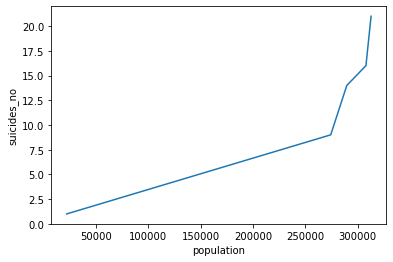

In [41]:
sns.lineplot(x='population', y='suicides_no', data=data.head())

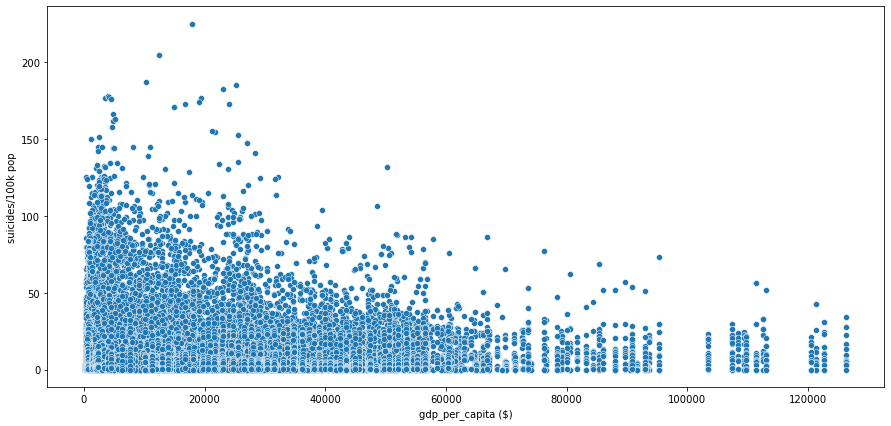

In [48]:
plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data)
plt.show()

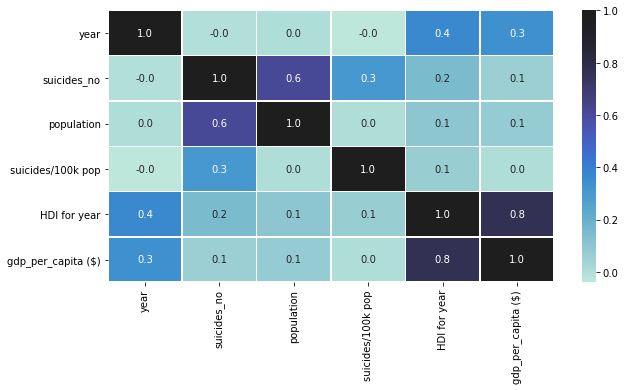

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', center=1)
plt.show()

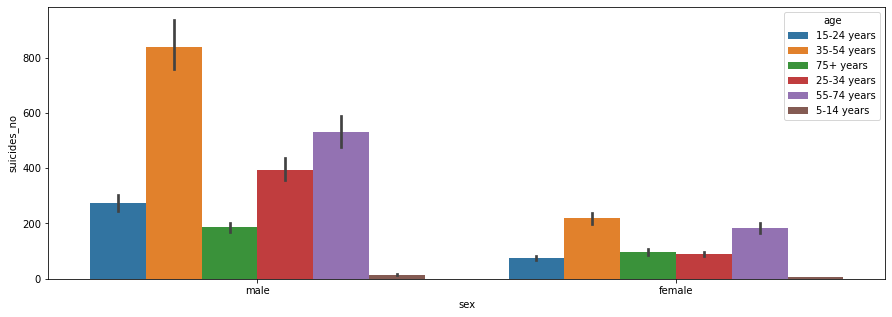

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no', hue='age')
plt.show()

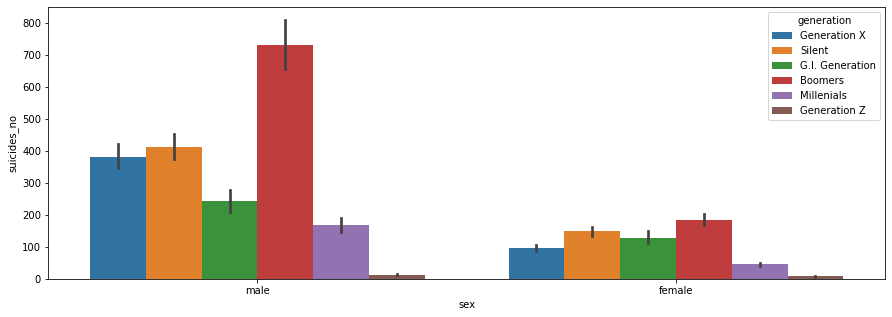

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no', hue='generation')
plt.show()

In [61]:
suic_sum_m = data['suicides_no'].groupby([data['country'], data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(10)

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country', x='suicides_no', hue='sex', data=most_cont_m, palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()

TypeError: sort_index() got an unexpected keyword argument 'by'

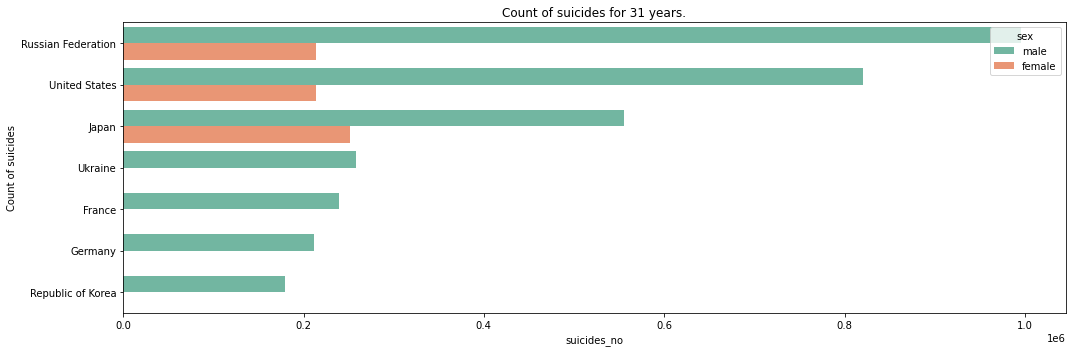

In [60]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country',x='suicides_no',hue='sex',data=most_cont_m,palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()


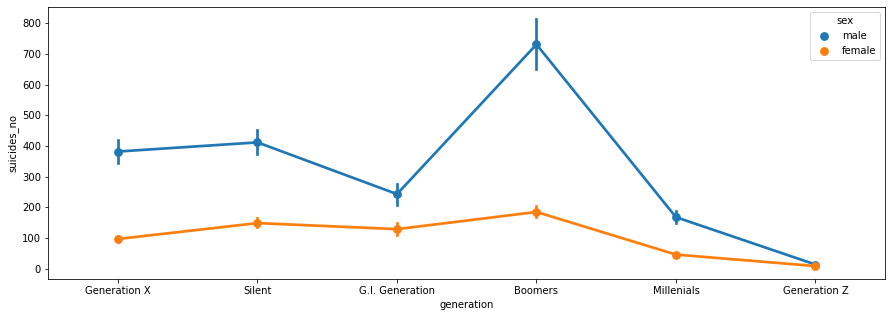

In [62]:
plt.figure(figsize=(15,5))
sns.pointplot(x="generation", y="suicides_no", hue='sex', data=data)
plt.show()

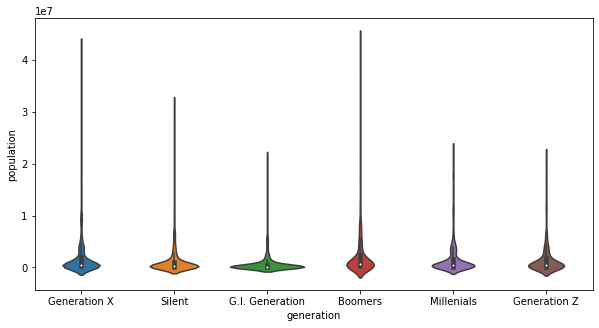

In [63]:
plt.figure(figsize=(10,5))
sns.violinplot(x=data.generation, y=data['population'])
plt.show()

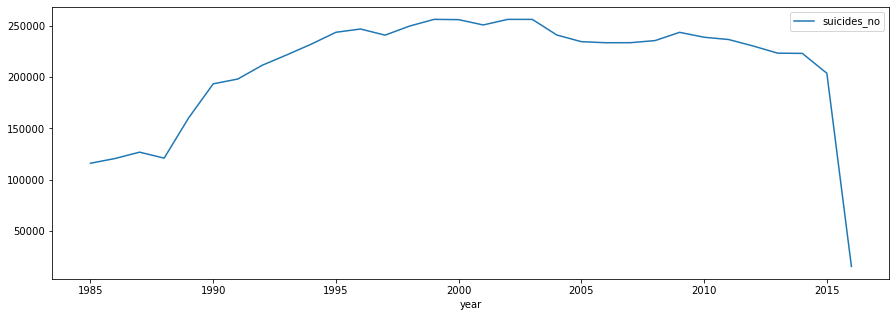

In [67]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

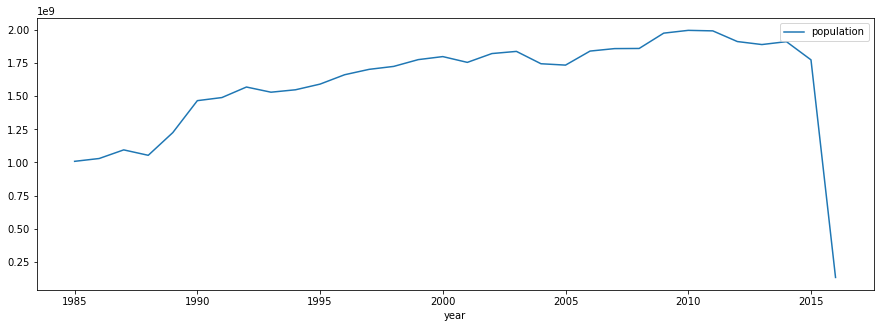

In [68]:
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

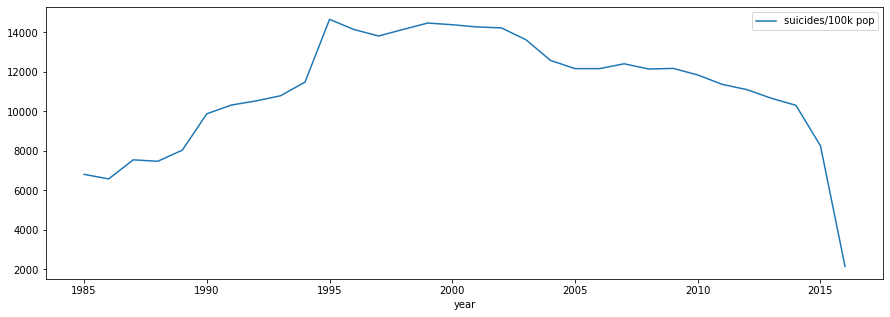

In [69]:
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

Pandas Profiling with IPL data
Generates profile reports from a pandas DataFrame. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

Link - https://pypi.org/project/pandas-profiling/

#Installation step #!pip install pandas-profiling #or import sys !{sys.executable} -m pip install pandas-profiling

!pip install -U pandas-profiling

In [73]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [74]:
import pandas_profiling

In [75]:
df = pd.read_csv('match_data.csv')

In [76]:
pandas_profiling.ProfileReport(df)

In [78]:
pandas_profiling.ProfileReport(df).to_file("output.html")

D:\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:101: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(


D:\Anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)
